In [ ]:
"""Experiments on how to detect clipping. 

Whether to use highest and lowest possible values or a softwer threshold.
Results are visualized to decide. 

This is an old notebook, newer one is clipping_detection.ipynb and functions moved to nna.clippingutils
"""

In [ ]:
from nna.fileUtils import list_files 
from pydub import AudioSegment
from IPython.display import display, Audio
from pathlib import Path
import librosa
import numpy as np
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd


In [280]:
from nna.clippingutils import get_clipping_percent

# def get_clipping_percent(sound,threshold=1):
#     soundArray=np.array(sound)
#     results=[]
#     #mono
#     if len(soundArray.shape)==1:
#         result=(((np.sum(soundArray <= -threshold) + np.sum(soundArray >= threshold))) / soundArray.size)
#         results.append(result)
#     elif len(soundArray.shape)==2:
#         for i in range(soundArray.shape[0]):
#             result=(((np.sum(soundArray[i] <= -threshold) + np.sum(soundArray[i] >= threshold))) / soundArray[i].size)
#             results.append(result)
#     return results
    

In [199]:
audiofiles=list_files("/home/enis/projects/nna/notebooks/trap_photo_audio_new3")


In [273]:
# y, sr = librosa.load(Path(audiofiles[15]),mono=False,sr=None)
# ymono, sr = librosa.load(Path(audiofiles[15]),mono=True,sr=None)

worst_path=results_1_copy[-2]

y, sr = librosa.load(Path(worst_path),mono=False,sr=None)
ymono, sr = librosa.load(Path(worst_path),mono=True,sr=None)


In [274]:

clipped=y[1][:(y[1].shape[0]//60)*7]


In [419]:
1000 / ymono.shape[0]

0.0020833333333333333

In [437]:
y[0].shape[0]/10

48000.0

In [452]:
get_clipping_percent(y,0.98)

[0.19578541666666666, 0.3320020833333333]

In [319]:
results_1_copy[0]

('/scratch/enis/data/nna/labeling/splits_real/S4A10255_20190517_163000_1m_21s__1m_31s.flac',
 [0.7754541666666667, 0.6658145833333333, 0.88509375])

In [478]:
for i in range(10):
    res=get_clipping_percent(y[:,(y[0].shape[0]//10)*i:(y[0].shape[0]//10)*(i+1)],0.98)
#     print(y[:,(y[0].shape[0]//10)*i:(y[0].shape[0]//10)*i+1])
    print(i,i+1,"{:.2}   {:.2}".format(*res))

0 1 0.053   0.046
1 2 0.0   0.021
2 3 0.037   0.019
3 4 0.01   0.017
4 5 0.0   0.14
5 6 0.095   0.29
6 7 0.0   0.0
7 8 0.0   0.0
8 9 0.0088   0.061
9 10 0.0   0.12


In [481]:
ipd.Audio(y[0], rate=sr)

[0.09520416666666667, 0.12536666666666665, 0.06504166666666666]


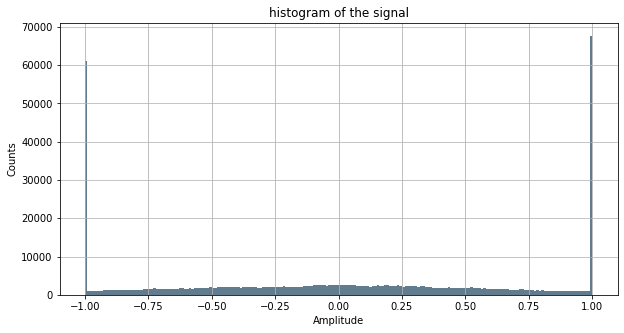

In [505]:
# y, sr = librosa.load(Path(audiofiles[15]),mono=False,sr=None)
# ymono, sr = librosa.load(Path(audiofiles[15]),mono=True,sr=None)
sample=results_1_copy[5300]
print(sample[1])
worst_path=sample[0]

y, sr = librosa.load(Path(worst_path),mono=False,sr=None)
ymono, sr = librosa.load(Path(worst_path),mono=True,sr=None)


# Generate data on commute times.
commutes = pd.Series(y[0])
# commutes = pd.Series(clipped)

commutes.plot.hist(cumulative=False,grid=True, bins=200, rwidth=0.999,
                   color='#617c8e',figsize=(10,5))
# commutes.plot()
plt.title('histogram of the signal')
plt.ylabel('Counts')
plt.xlabel('Amplitude')
plt.grid(axis='y', alpha=0.9)
# plt.savefig("cum_hist_1000bins.png",bbox_inches='tight',pad_inches=0.0)

In [496]:
# ipd.Audio(ymono, rate=sr)

In [497]:
# ipd.Audio(y[0], rate=sr)

In [188]:
len(y)

7813

In [ ]:
# # Plot a monophonic waveform
# # y, sr = librosa.load(librosa.util.example_audio_file(), duration=10)
# plt.figure(figsize=(12, 3))

# plt.subplot(1, 1, 1)
# librosa.display.waveplot(ymono, sr=sr)
# plt.title('Mono')

# # plt.savefig('books_read.png')
# plt.show()


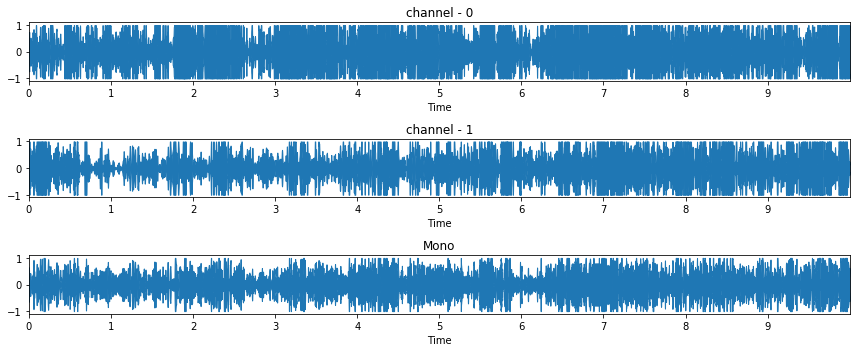

In [506]:
# Plot a monophonic waveform
# y, sr = librosa.load(librosa.util.example_audio_file(), duration=10)
plt.figure(figsize=(12, 5))

plt.subplot(3, 1, 1)
librosa.display.waveplot(np.asfortranarray(y[0]), sr=sr)
plt.title('channel - 0')

# plt.figure(figsize=(12, 3))

plt.subplot(3, 1, 2)
librosa.display.waveplot(np.asfortranarray(y[1]), sr=sr)
plt.title('channel - 1')

plt.subplot(3, 1, 3)
librosa.display.waveplot(np.asfortranarray(ymono), sr=sr)
plt.title('Mono')
# plt.savefig('books_read.png')
# plt.show()
plt.tight_layout()
# plt.savefig('multiple.png')


In [507]:
ipd.Audio(y[0], rate=sr)

In [504]:
ipd.Audio(y[1], rate=sr)

In [ ]:
"mono: {:.2}  cha1: {:.2}  cha2: {:.2}".format(*get_clipping_percent(y,1))


In [ ]:
soundArray=np.array(y)

In [ ]:
ynp.shape

In [ ]:
np.sum(soundArray[0] >= 0.99) / np.sum(soundArray[0] > 0)

In [ ]:
(np.sum(soundArray[0] <= -0.99))  /  np.sum(soundArray[0] < 0)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
len(np.where( ynp[0] > 0.9)[0])/2880000

In [ ]:
results=[]
for i in audiofiles:
    y, sr = librosa.load(i,mono=False,sr=None)
    soundArray=np.array(y)
    result=(((np.sum(soundArray[1] <= -0.99) + np.sum(soundArray[1] >= 0.99))) / soundArray[1].size)
    results.append(result)

In [ ]:
for audiof in audiofiles:
    y, sr = librosa.load(audiof,mono=False,sr=None)
    print("mono: {:.2}  cha1: {:.2}  cha2: {:.2}".format(*get_clipping_percent(y,1)))


In [ ]:
combined=sorted(list(zip(results,audiofiles)),reverse=True)
for i,k in enumerate(combined):
    print(i,"{:.2}".format(k[0]),k[1].split("/")[-1])

In [ ]:
listen, listen_sr = librosa.load(combined[8][1],mono=False,sr=None)
ipd.Audio(listen, rate=listen_sr)

In [ ]:
# Plot a monophonic waveform

# y, sr = librosa.load(librosa.util.example_audio_file(), duration=10)
plt.figure(figsize=(12, 3))

plt.subplot(1, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title('Stereo')

plt.savefig('books_read.png')
# plt.show()


In [ ]:
ipd.Audio(y, rate=sr)

In [5]:
split_files=list_files("/scratch/enis/data/nna/labeling/splits_real")

In [6]:
len(split_files)

10132

In [9]:
results_1=[]
resukts_99=[]
monoresults_1=[]
monoresults_99=[]
for ii,i in enumerate(split_files):
    try:
        y, sr = librosa.load(i,mono=False,sr=None)
    except:
        pass

    # 1.0
    res=get_clipping_percent(y,1)
    if len(res)!=3:
        monoresults_1.append((i,res))
    else:
        results_1.append((i,res))
    
    #0.99
    res=get_clipping_percent(y,0.99)
    if len(res)!=3:
        monoresults_99.append((i,res))
    else:
        resukts_99.append((i,res))
    
    if ii%100==0:
        print(ii//100)

0
1
2
3
4
5
6


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


7
8
9
10
11


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


12


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


13
14


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


15
16
17


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


18
19
20


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


21


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


22
23
24
25
26
27
28
29
30


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


31


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


32
33
34
35
36
37
38
39
40
41
42


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


43


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


44


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


45
46


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


47


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


48
49
50
51
52


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


53
54
55
56


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


57
58


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


75
76
77
78
79


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


80
81
82
83


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


84
85
86


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


87
88
89


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


90


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


91
92


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


93
94
95
96
97
98
99
100
101


In [320]:
results_1_copy=results_1[:]
results_1_copy=sorted(results_1_copy,key=lambda x:x[1][1])

print("worst",results_1_copy[-2])
worst_path=results_1_copy[-1][0]

worst ('/scratch/enis/data/nna/labeling/splits_real/S4A10268_20190517_133000_4m_35s__4m_45s.flac', [0.4244572916666667, 0.4763604166666667, 0.3725541666666667])


In [321]:
results_99_copy=resukts_99[:]
results_99_copy=sorted(results_99_copy,key=lambda x:x[1][1])

print("worst",results_99_copy[-2])
worst_path=results_99_copy[-1][0]

worst ('/scratch/enis/data/nna/labeling/splits_real/S4A10259_20190517_213000_72m_57s__73m_7s.flac', [0.84135625, 0.937075, 0.7456375])


In [314]:
x=100
set(results_99_copy[-x:]).difference(set(results_1_copy[-x:]))

TypeError: unhashable type: 'list'

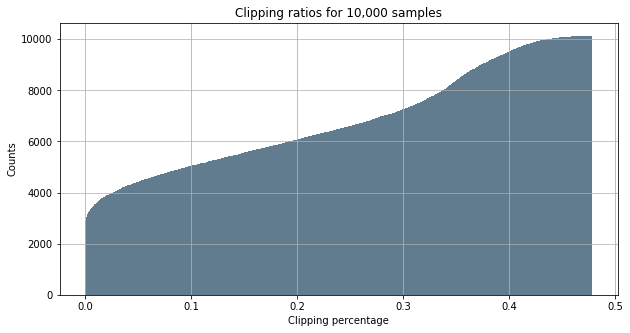

In [182]:

results_series=results_1np[:,1]
# results_series=results_series[results_series<=0.025]

# Generate data on commute times.
commutes = pd.Series(results_series)

commutes.plot.hist(cumulative=True,grid=True, bins=1000, rwidth=0.999,
                   color='#617c8e',figsize=(10,5))
plt.title('Clipping ratios for 10,000 samples')
plt.ylabel('Counts')
plt.xlabel('Clipping percentage')
plt.grid(axis='y', alpha=0.9)
plt.savefig("cum_hist_1000bins.png",bbox_inches='tight',pad_inches=0.0)

In [175]:
import pandas as pd

# Generate data on commute times.
commutes = pd.Series(results_99np[:,2])

commutes.plot.hist(cumulative=True,grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Clipping ratios for 10,000 samples')
plt.ylabel('Counts')
plt.xlabel('Clipping percentage')
plt.grid(axis='y', alpha=0.75)
plt.savefig("a.png")

In [110]:
results_1np[results_1np[:,0]>0.1].size

15531

In [108]:
results_1np[:,0].size

10128

In [194]:
results_series=results_1np[:,1]
results_series[results_series>0.5].size/results_series.size

0.0

In [151]:
results_series[results_series<=0.025].size

3813

In [187]:
results_series[results_series<=0.025].size

3973

In [563]:
threshold=0.2
thresholdlowwer=0.08
results_1np[(results_1np[:,0]<=threshold) & (results_1np[:,1]<=threshold)].shape
upper=results_1np[(results_1np[:,0]<=threshold) & (results_1np[:,1]<=threshold)]
print(upper.shape)
upper[(thresholdlowwer>upper[:,0]) & (thresholdlowwer>upper[:,1])].shape


(5870, 3)


(4550, 3)

In [557]:
threshold=0.08
thresholdlowwer=0.02
upper=results_1np[(results_1np[:,0]<=threshold) & (results_1np[:,1]<=threshold)]
upper[(thresholdlowwer>upper[:,0]) & (thresholdlowwer>upper[:,1])].shape


(3566, 3)

In [558]:
threshold=0.02
thresholdlowwer=0.001

upper=results_1np[(results_1np[:,0]<=threshold) & (results_1np[:,1]<=threshold)]
upper[(thresholdlowwer>upper[:,0]) & (thresholdlowwer>upper[:,1])].shape


(2582, 3)

In [561]:
# 

In [560]:
threshold=0.001
# thresholdlowwer=0
upper=results_1np[(results_1np[:,0]<=threshold) & (results_1np[:,1]<=threshold)]
print(upper.shape)
# upper[(thresholdlowwer>upper[:,0]) & (thresholdlowwer>upper[:,1])].shape


(2582, 3)
